In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cftime
from matplotlib.colors import Normalize
from scipy.stats import gaussian_kde
DPI = 100


In [3]:
filename = 'planilhas/vix_mes_1990_2020.csv'
df = pd.read_csv(filename, sep=';', skiprows= 10,
                 header=0, index_col=0)#.dropna()
print(filename)

planilhas/vix_mes_1990_2020.csv


In [4]:
df.index

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='Ano')

In [5]:
df.index = pd.to_datetime(df.index, errors='coerce')
df.index

DatetimeIndex(['1970-01-01 00:00:00.000001990',
               '1970-01-01 00:00:00.000001991',
               '1970-01-01 00:00:00.000001992',
               '1970-01-01 00:00:00.000001993',
               '1970-01-01 00:00:00.000001994',
               '1970-01-01 00:00:00.000001995',
               '1970-01-01 00:00:00.000001996',
               '1970-01-01 00:00:00.000001997',
               '1970-01-01 00:00:00.000001998',
               '1970-01-01 00:00:00.000001999',
                  '1970-01-01 00:00:00.000002',
               '1970-01-01 00:00:00.000002001',
               '1970-01-01 00:00:00.000002002',
               '1970-01-01 00:00:00.000002003',
               '1970-01-01 00:00:00.000002004',
               '1970-01-01 00:00:00.000002005',
               '1970-01-01 00:00:00.000002006',
               '1970-01-01 00:00:00.000002007',
               '1970-01-01 00:00:00.000002008',
               '1970-01-01 00:00:00.000002009',
               '1970-01-01 00:00:00.0000

In [6]:
df

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
Ano,,,,,,,,,,,,
1970-01-01 00:00:00.000001990,27.00,27.60,27.80,27.10,24.10,23.30,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000001992,NaN,NaN,NaN,NaN,NaN,23.30,22.0,21.8,22.20,23.8,24.3,24.90
1970-01-01 00:00:00.000001993,26.86,27.32,27.72,26.10,23.90,22.10,22.8,22.0,23.60,24.3,25.7,26.00
1970-01-01 00:00:00.000001994,26.60,27.80,26.30,25.00,25.00,23.00,22.4,22.0,22.80,24.1,25.2,26.40
1970-01-01 00:00:00.000001995,27.90,27.90,27.20,25.30,24.30,23.20,23.1,23.7,23.40,24.2,24.5,25.40
1970-01-01 00:00:00.000001996,27.50,28.20,27.90,25.60,23.10,22.30,21.8,21.6,22.60,24.0,24.1,26.30
1970-01-01 00:00:00.000001997,26.60,26.60,25.20,24.92,23.20,23.10,22.4,22.7,24.00,24.4,26.3,27.10
1970-01-01 00:00:00.000001998,27.90,28.10,27.80,26.70,24.80,22.30,22.3,23.9,24.34,23.9,23.7,26.70


In [7]:
# uma pequena lista de meses
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Maio', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

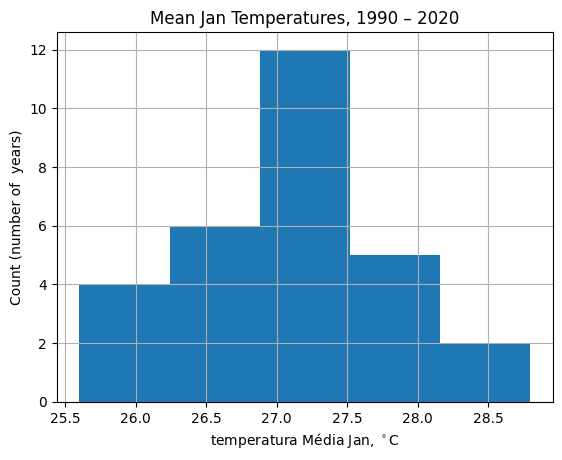

In [8]:
df['jan'].hist(bins=5)
plt.xlabel(r'temperatura Média Jan, $^\circ\mathrm{C}$')
plt.ylabel('Count (number of  years)')
plt.title('Mean Jan Temperatures, 1990 – 2020')
plt.show()


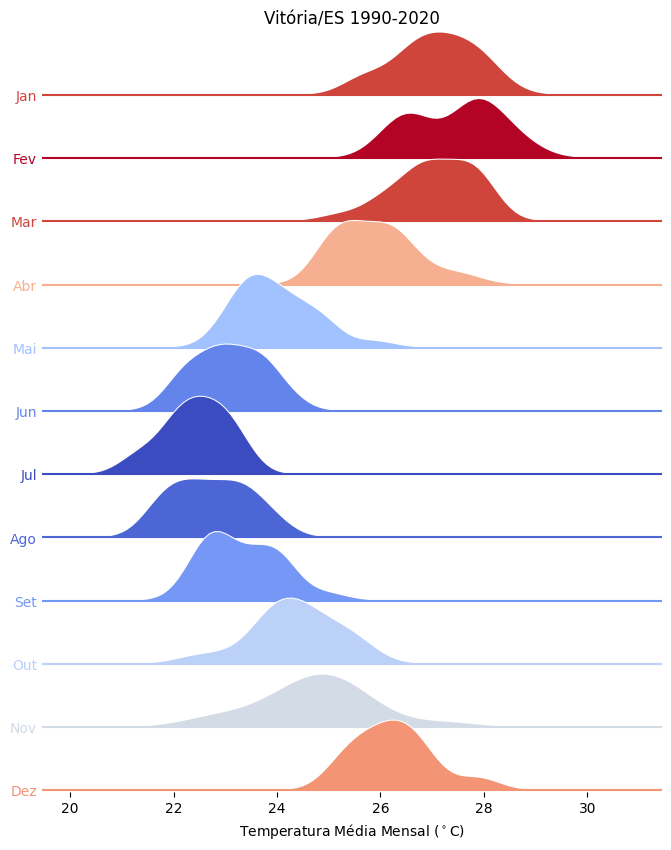

In [10]:
def plot_monthly_temperatures(filename, ax, title):
    """Make a ridgeline plot from the temperatures on Axes ax."""

    # Read the data into a pandas DataFrame.
    df = pd.read_csv(filename, sep=';', skiprows=10, header=0,
                     index_col=0).dropna()
    # The months are identified as the first 12 column names.
    months = df.columns[:12]
    # Get the mean temperatures across all years for each month.
    meanT = df[months].mean()
    # For a single plot, we might just take the min and max for that region.
    minT, maxT = np.min(meanT), np.max(meanT)
    # But to properly compare across regions, set these to their values across
    # both regions.
    #minT, maxT = 24.00, 29.00
    norm = Normalize(vmin=minT, vmax=maxT)

    # The temperature grid to plot the distributions on.
    T = np.arange(20, 31, 0.1)

    # A colormap: blue (cold) to red (warm).
    cmap = plt.get_cmap('coolwarm')

    # Offset each plot vertically by this amount. It looks nice if they overlap.
    offset = 0.45
    # The y-axis ticks are the month names.
    ax.yaxis.set_tick_params(length=0, width=0)
    ax.set_ylim(-0.01, 12*offset)
    ax.set_yticks(np.arange(0, 12*offset, offset))
    ax.set_yticklabels(months[::-1].str.title())
    yticklabels = ax.yaxis.get_ticklabels()

    for i, month in enumerate(months[::-1]):
        c = cmap(norm(meanT[month]))
        dist = gaussian_kde(df[month])
        # Plot the distribution in an white, which acts as an outline to the
        # filled region (in an appropriate colour) under each line.
        ax.plot(T, dist(T) + i * offset, c='w', zorder=15-i)
        ax.fill_between(T, dist(T) + i * offset, i * offset, fc=c, zorder=15-i) 
        # Complete with a base line across the width of the plot.
        ax.axhline(i * offset, c=c, zorder=15-i)
        # Also set the month name to the same colour as the plot.
        yticklabels[i].set_color(c)

    ax.set_xlabel(r'Temperatura Média Mensal ($^\circ\mathrm{C}$)')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_title(title)

# Two plots, one above the other.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(800/DPI, 800/DPI), dpi=DPI)
#filename = 'vix_mes_1990_2020.csv'
plot_monthly_temperatures(filename, axes, 'Vitória/ES 1990-2020')
plt.subplots_adjust(top=1, bottom=0.05, hspace=0.2)
#plt.savefig('temps-kde.png', dpi=DPI)
plt.show()

In [23]:
#np.max(meanT)
months = df.columns[:12]
meanT = df[months].mean()
meanT

jan    27.095172
fev    27.510345
mar    27.081724
abr    25.140690
mai    24.004286
jun    23.047000
jul    22.453571
ago    22.660714
set    23.403929
out    24.324138
nov    24.807143
dez    26.215556
dtype: float64

In [24]:
np.max(meanT)

27.510344827586206

In [25]:
np.min(meanT)

22.45357142857143

In [17]:
np.min(data)

0.0639052727692846

In [18]:
np.max(data)

9.944735145316669

In [32]:
filename = 'planilhas/Planilha_Vitoria.csv'
df = pd.read_csv(filename, sep=';', encoding='utf-8') #header=0, index_col=0)#.dropna()
df

,Data,Tx,Tn,Tmed,UR,Prec,Evap,Eto,Insolação
0,01/01/1976,"30,5","22,6",NaN,NaN,"1,4",NaN,NaN,NaN
1,02/01/1976,"29,0","22,3",NaN,NaN,"4,2",NaN,NaN,NaN
2,03/01/1976,"29,0","23,2",NaN,NaN,"1,6",NaN,NaN,NaN
3,04/01/1976,"29,4","22,8",NaN,NaN,"5,6",NaN,NaN,NaN
4,05/01/1976,"29,8","22,6",NaN,NaN,"0,0",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
17162,27/12/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17163,28/12/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17164,29/12/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17165,30/12/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df['Data'] = pd.to_datetime(df['Data'],format='%d/%m/%Y', dayfirst=True)

In [39]:
df['Data']

0       1976-01-01
1       1976-01-02
2       1976-01-03
3       1976-01-04
4       1976-01-05
           ...    
17162   2022-12-27
17163   2022-12-28
17164   2022-12-29
17165   2022-12-30
17166   2022-12-31
Name: Data, Length: 17167, dtype: datetime64[ns]

In [40]:
df.set_index('Data', inplace=True)
df

,Tx,Tn,Tmed,UR,Prec,Evap,Eto,Insolação
Data,,,,,,,,
1976-01-01,"30,5","22,6",NaN,NaN,"1,4",NaN,NaN,NaN
1976-01-02,"29,0","22,3",NaN,NaN,"4,2",NaN,NaN,NaN
1976-01-03,"29,0","23,2",NaN,NaN,"1,6",NaN,NaN,NaN
1976-01-04,"29,4","22,8",NaN,NaN,"5,6",NaN,NaN,NaN
1976-01-05,"29,8","22,6",NaN,NaN,"0,0",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df[0]

KeyError: 0